# Viseklasna klasifikacija uz objedinjavanje jednocifrenih i dvocifrenih klasa u jednu i primenu PCA

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import losses, optimizers

from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

from sklearn.decomposition import PCA

np.random.seed(10)

import category_encoders as ce

from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
# Ucitavanje podataka iz skupa sa imenima klasa
data = pd.read_csv('kddcup.csv.data_10_percent_corrected')

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
data.drop(columns = ['num_outbound_cmds', 'is_host_login'], axis = 1, inplace = True)

In [4]:
y = data['class']

Klase sa jednocifrenim i dvocifrenim brojem instanci objedinjujemo u jednu klasu pod nazivom 'other_attacks'. Koliko koja klasa ima instanci se moze videti u svesci Provera reprezentativnosti uzorka + informacije o podacima.

In [6]:
y.loc[y == 'spy.'] = 'other_attacks.'

y.loc[y == 'perl.'] = 'other_attacks.'

y.loc[y == 'phf.'] = 'other_attacks.'

y.loc[y == 'multihop.'] = 'other_attacks.'

y.loc[y == 'ftp_write.'] = 'other_attacks.'

y.loc[y == 'loadmodule.'] = 'other_attacks.'

y.loc[y == 'rootkit.'] = 'other_attacks.'

y.loc[y == 'imap.'] = 'other_attacks.'

y.loc[y == 'warezmaster.'] = 'other_attacks.'

y.loc[y == 'land.'] = 'other_attacks.'

y.loc[y == 'buffer_overflow.'] = 'other_attacks.'

y.loc[y == 'guess_passwd.'] = 'other_attacks.'

len(np.where(y == 'other_attacks.')[0])

179

In [7]:
y = y.astype('category')

y = y.cat.codes

len(np.unique(y))

12

In [8]:
encoder = ce.BinaryEncoder(data, cols = ['protocol_type', 'service', 'flag'])
X = encoder.fit_transform(data)

X = X.drop(columns = ['class'])

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state=7)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
pca = PCA(n_components=15)
pca.fit(X_train, y_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(units=150, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=12, activation='softmax'))

model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
batch_size = 128
epochs = 30

history = model.fit(X_train_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/30
330994/330994 [==============================] - 43s 129us/step - loss: 0.2105 - accuracy: 0.9730
Epoch 2/30
330994/330994 [==============================] - 39s 117us/step - loss: 0.0191 - accuracy: 0.9955
Epoch 3/30
330994/330994 [==============================] - 40s 120us/step - loss: 0.0122 - accuracy: 0.9968
Epoch 4/30
330994/330994 [==============================] - 44s 134us/step - loss: 0.0099 - accuracy: 0.9973
Epoch 5/30
330994/330994 [==============================] - 45s 136us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 6/30
330994/330994 [==============================] - 46s 139us/step - loss: 0.0081 - accuracy: 0.9978
Epoch 7/30
330994/330994 [==============================] - 45s 136us/step - loss: 0.0075 - accuracy: 0.9979
Epoch 8/30
330994/330994 [==============================] - 47s 143us/step - loss: 0.0069 - accuracy: 0.9981
Epoch 9/30
330994/330994 [==============================] - 44s 134us/step - loss: 0.0065 - accuracy: 0.9982
Epoch 10/30
330994/

In [14]:
score = model.evaluate(X_test_pca, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


163027/163027 [==============================] - 31s 192us/step
Test loss: 0.004013982517722109
Test accuracy: 0.9988774657249451


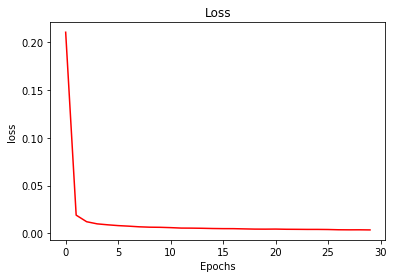

In [15]:
epochs = history.epoch

loss = history.history['loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red')
plt.show()

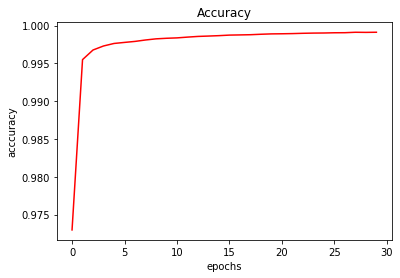

In [16]:
acc = history.history['accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red')
plt.show()

In [17]:
y_predicted = model.predict(X_test_pca)
y_predicted_classes = np.argmax(y_predicted, axis = 1)

y_test_classes = np.argmax(y_test, axis = 1)


In [18]:
print(confusion_matrix(y_test_classes, y_predicted_classes))


[[  725     0     0     0     2     0     0     0     0     0     0     0]
 [    0   405     0     2     4     0     0     1     0     0     0     0]
 [    0     0 35376     0     0     0     0     0     0     0     0     0]
 [    0     1     0    64    11     0     0     0     0     0     0     0]
 [   15     8     6     1 32054     3     0     1     0     1     0    13]
 [    0     0     0     0    16    43     0     0     0     0     0     0]
 [    0     0     0     0     3     0    84     0     0     0     0     0]
 [    0     0     3     0     4     0     0   333     3     0     0     0]
 [    0     0     0     0     7     0     0     6   511     0     0     0]
 [    0     0     0     0     4     0     0     0     0 92657     0     0]
 [    0     0     0     0     0     0     0     0     0     0   323     0]
 [    0     1     0     1    66     0     0     0     0     0     0   269]]


In [19]:
print(classification_report(y_test_classes, y_predicted_classes))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       727
           1       0.98      0.98      0.98       412
           2       1.00      1.00      1.00     35376
           3       0.94      0.84      0.89        76
           4       1.00      1.00      1.00     32102
           5       0.93      0.73      0.82        59
           6       1.00      0.97      0.98        87
           7       0.98      0.97      0.97       343
           8       0.99      0.98      0.98       524
           9       1.00      1.00      1.00     92661
          10       1.00      1.00      1.00       323
          11       0.95      0.80      0.87       337

    accuracy                           1.00    163027
   macro avg       0.98      0.94      0.96    163027
weighted avg       1.00      1.00      1.00    163027

